In [1]:
%load_ext autoreload
%autoreload 2

# Dataset Exploration

In [2]:
from src.dataset import sentiment_dataloader as dl
src_file = "build/datasets/labelled_text.csv"
df = dl.load_data(src_file, column_names = ["user_id", "source", "sentiment", "chat"])

In [3]:
df.head()

,user_id,source,sentiment,chat
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
for c, s in zip(df["chat"][:20], df["sentiment"][50:70]):
    print(c, s)
    print()

im getting on borderlands and i will murder you all , Neutral

I am coming to the borders and I will kill you all, Neutral

im getting on borderlands and i will kill you all, Neutral

im coming on borderlands and i will murder you all, Neutral

im getting on borderlands 2 and i will murder you me all, Negative

im getting into borderlands and i can murder you all, Negative

So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg Negative

So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg Negative

So I spent a few hours

In [5]:
df.sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [6]:
len(df["source"].unique())

32

<AxesSubplot:>

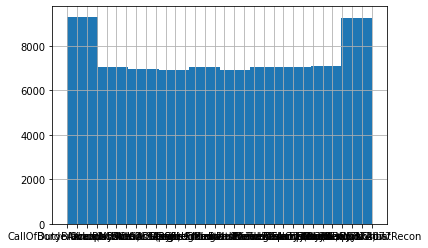

In [7]:
df["source"].hist()

<AxesSubplot:>

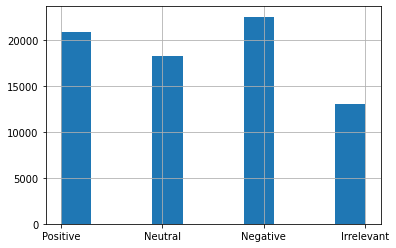

In [8]:
df["sentiment"].hist()

In [9]:
df = dl.preprocess(df)

[nltk_data] Downloading package wordnet to /home/kareem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kareem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kareem/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/kareem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df.sentiment.unique(), df.shape

(array([0, 1, 2]), (50398, 4))

In [11]:
for c, s in zip(df["chat"][:20], df["sentiment"][:20]):
    print(c, s)
    print()

im getting murder 0

coming borders kill 0

im getting kill 0

im coming murder 0

spent hours making something fun dont know HUGE fan Maya one favorite characters decided make wallpaper PC original image versus creation made : ) Enjoy 0

spent couple hours something fun dont know Im huge fan Maya one favorite characters decided make wallpaper PC Heres original picture compared creation made : ) fun mLsIwfJg 0

spent hours something fun dont know Im HUGE fan Maya one favorite characters 0

spent hours making something fun dont know HUGE RhandlerR fan Maya one favorite characters decided make wallpaper PC original image versus creation made : ) Enjoy 0

RockHard La Varlope RARE POWERFUL HANDSOME JACKPOT ( Xbox ) 1

RockHard La Varlope RARE POWERFUL HANDSOME JACKPOT ( Xbox ) RMTrgF 1

RockHard La Vita RARE POWERFUL HANDSOME JACKPOT ( Xbox ) 1

Live Rock Hard music La la Varlope RARE POWERFUL Live HANDSOME JACKPOT ( Sega Xbox ) dlvr e RMTrgF 1

IHard like RARE LONDON DE HANDSOME ( Xbox ) 

In [12]:
print(df.source.unique())

['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']


In [13]:
df_train = df[df.source.isin(df.source.unique()[:26])] 
df_val =  df[df.source.isin(df.source.unique()[26:29])] 
df_test = df[df.source.isin(df.source.unique()[29:])] 

len(df_train), len(df_val), len(df_test)

(40201, 4981, 5216)

<AxesSubplot:>

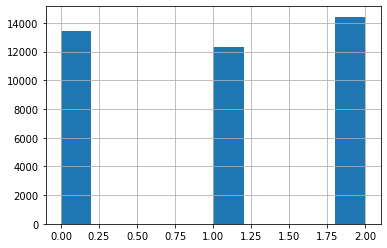

In [14]:
df_train.sentiment.hist()

<AxesSubplot:>

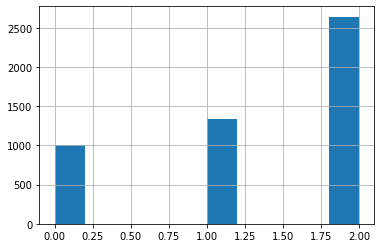

In [15]:
df_val.sentiment.hist()

<AxesSubplot:>

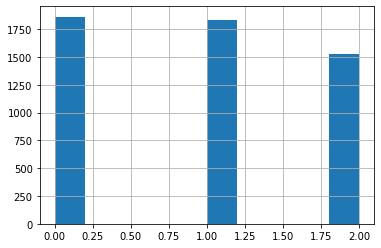

In [16]:
df_test.sentiment.hist()

## Finding the best encoding length
We notice that an encoding length of 64 can already cover most our samples

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/kareem/PycharmProjects/sentiment_analylsis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Token count')

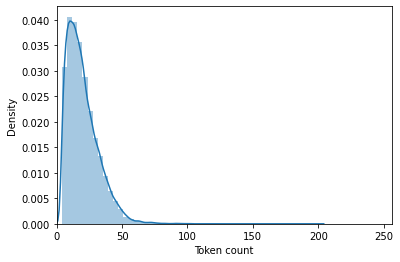

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
from transformers import BertTokenizer
PRE_TRAINED_MODEL_NAME = "bert-base-cased"

token_lens = []
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

for txt in df.chat:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))
    
sns.distplot(token_lens)
plt.xlim([0, 256])
plt.xlabel('Token count')

# Testing our dataloader

In [20]:
from src.runners.train import trainer, get_dataloader

src_file = "build/datasets/labelled_text.csv"
loader, _ = get_dataloader(src_file, max_encoding_len = 64)

[nltk_data] Downloading package wordnet to /home/kareem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kareem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kareem/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/kareem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


number of train, val, test samples 40201 4981 5216


In [21]:
print("val dataloader sources", loader.val_srcs)
print("Test dataloader sources", loader.test_srcs)

val dataloader sources ['GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson']
val dataloader sources ['Cyberpunk2077' 'TomClancysGhostRecon' 'Nvidia']


# Training


In [22]:
from src.runners.train import trainer

conf = {
        "batch_size": 32,
        "model_name": "bert-base-cased",
        "max_input_len": 64,
        "data_src_file": "build/datasets/labelled_text.csv",
        "epochs": 10,
        "lr": 2e-5,
        "weight_decay": 1e-2,
        "dropout_rate": 0.3,
    }


### Note: the following code will start the training

In [ ]:
trainer(conf=conf)

# Running from checkpoint on Test dataset again

In [ ]:
ckpt = "build/models/Bert-epoch=01-val_acc=70.06.ckpt"

trainer(conf=conf, run_train=False, run_val=True, run_test=True, ckpt=ckpt)

[nltk_data] Downloading package wordnet to /home/kareem/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kareem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kareem/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/kareem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


number of train, val, test samples 40201 4981 5216


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 

Testing: 0it [00:00, ?it/s]

/home/kareem/PycharmProjects/sentiment_analylsis/venv/lib/python3.8/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (_ResultMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


{'avg_loss': tensor(0.7448), 'avg_acc': 69.95}
Validation stats [[0.521 0.219 0.26 ]
 [0.073 0.715 0.213]
 [0.084 0.156 0.759]]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

# Inference

In [40]:
from src.runners import infer
ckpt = "build/models/Bert-epoch=01-val_acc=70.06.ckpt"

print(infer.infer("this product is terrible", ckpt=ckpt))
print(infer.infer("That is totally unacceptable", ckpt=ckpt))

print(infer.infer("this product is amazing", ckpt=ckpt))
print(infer.infer("wow very cool stuff. I like that", ckpt=ckpt))

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(0.6600717902183533, 'Negative')


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(0.7118988037109375, 'Negative')


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(0.7620547413825989, 'Positive')


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


(0.7084530591964722, 'Positive')


## API
to use docker build image using: `docker build . -t sentiment-api`

run
`python main.py`
or 
`docker run -p 8080:8080 -dv $PWD:/app sentiment-api`
from terminal

In [13]:
import requests, json
resp = requests.get("http://127.0.0.1:8080/list_ckpts")
ret = resp.json()
print(ret)

ckpt = ret["ckpts"][1]
print("choosing ckpt", ckpt)

send_json = {"text": "I am in love with this app", "ckpt": ckpt}
resp = requests.post("http://127.0.0.1:8080/predict", json=send_json)
ret = resp.json()
print(ret)

send_json = {"text": "I am not impressed", "ckpt": ckpt}
resp = requests.post("http://127.0.0.1:8080/predict", json=send_json)
ret = resp.json()
print(ret)

{'ckpts': ['Bert-epoch=01-val_acc=70.06.ckpt', 'Bert-epoch=00-val_acc=71.29.ckpt']}
choosing ckpt Bert-epoch=00-val_acc=71.29.ckpt
{'confidence': 0.9777937531471252, 'label': 'Positive'}
{'confidence': 0.769819974899292, 'label': 'Negative'}
